In [2]:
# Use the Azure Machine Learning data preparation package
from azureml.dataprep import package

# Use the Azure Machine Learning data collector to log various metrics
from azureml.logging import get_azureml_logger
logger = get_azureml_logger()


In [3]:
# Use Azure Machine Learning history magic to control history collection
# History is off by default, options are "on", "off", or "show"
# %azureml history on


In [4]:
# This call will load the referenced package and return a DataFrame.
# If run in a PySpark environment, this call returns a
# Spark DataFrame. If not, it returns a Pandas DataFrame.
df = package.run('Data analysis.dprep', dataflow_idx=0)

# Remove this line and add code that uses the DataFrame
df.head(10)

,bathrooms,bedrooms,condition,date,floors,grade,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,1.00,3.0,3.0,20141013T000000,1.0,7.0,47.5112,-122.257,221900.0,1180.0,0.0,1180.0,1340.0,5650.0,5650.0,0.0,0.0,1955.0,0.0,98178.0
1,2.25,3.0,3.0,20141209T000000,2.0,7.0,47.7210,-122.319,538000.0,2170.0,400.0,2570.0,1690.0,7242.0,7639.0,0.0,0.0,1951.0,1991.0,98125.0
2,1.00,2.0,3.0,20150225T000000,1.0,6.0,47.7379,-122.233,180000.0,770.0,0.0,770.0,2720.0,10000.0,8062.0,0.0,0.0,1933.0,0.0,98028.0
3,3.00,4.0,5.0,20141209T000000,1.0,7.0,47.5208,-122.393,604000.0,1050.0,910.0,1960.0,1360.0,5000.0,5000.0,0.0,0.0,1965.0,0.0,98136.0
4,2.00,3.0,3.0,20150218T000000,1.0,8.0,47.6168,-122.045,510000.0,1680.0,0.0,1680.0,1800.0,8080.0,7503.0,0.0,0.0,1987.0,0.0,98074.0
5,4.50,4.0,3.0,20140512T000000,1.0,11.0,47.6561,-122.005,1225000.0,3890.0,1530.0,5420.0,4760.0,101930.0,101930.0,0.0,0.0,2001.0,0.0,98053.0
6,2.25,3.0,3.0,20140627T000000,2.0,7.0,47.3097,-122.327,257500.0,1715.0,0.0,1715.0,2238.0,6819.0,6819.0,0.0,0.0,1995.0,0.0,98003.0
7,1.50,3.0,3.0,20150115T000000,1.0,7.0,47.4095,-122.315,291850.0,1060.0,0.0,1060.0,1650.0,9711.0,9711.0,0.0,0.0,1963.0,0.0,98198.0
8,1.00,3.0,3.0,20150415T000000,1.0,7.0,47.5123,-122.337,229500.0,1050.0,730.0,1780.0,1780.0,7470.0,8113.0,0.0,0.0,1960.0,0.0,98146.0
9,2.50,3.0,3.0,20150312T000000,2.0,7.0,47.3684,-122.031,323000.0,1890.0,0.0,1890.0,2390.0,6560.0,7570.0,0.0,0.0,2003.0,0.0,98038.0


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

## Correlation between square footage above ground and price

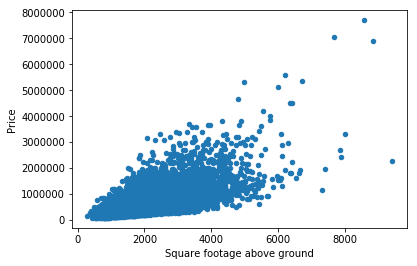

In [8]:
df.plot.scatter('sqft_above', 'price')
plt.xlabel('Square footage above ground')
plt.ylabel('Price')
plt.show()

## Correlation between # bedrooms and price

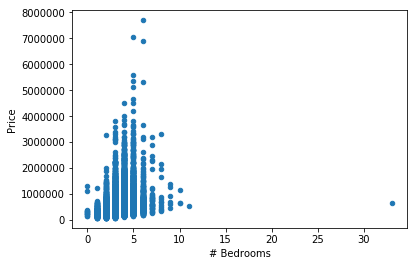

In [10]:
df.plot.scatter('bedrooms', 'price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price')
plt.show()

## Correlation between # badrooms and price

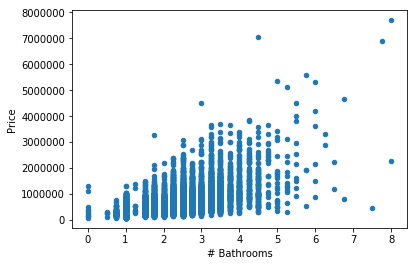

In [12]:
df.plot.scatter('bathrooms', 'price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price')
plt.show()

## Correlation between grade and price

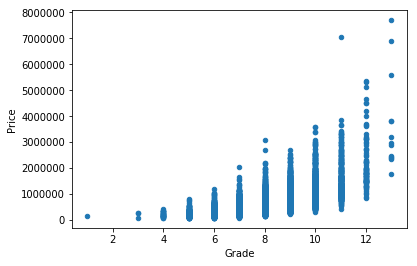

In [13]:
df.plot.scatter('grade', 'price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

## Correlation between rennovation and price

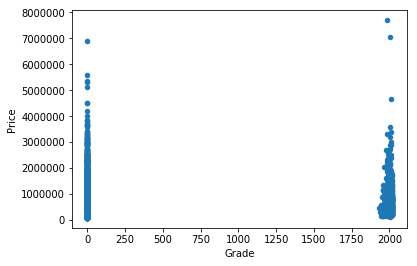

In [14]:
df.plot.scatter('yr_renovated', 'price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

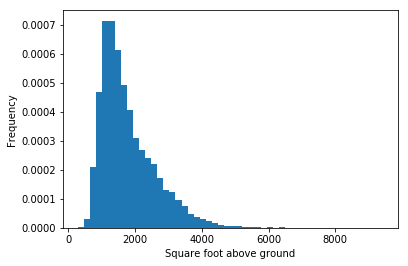

In [27]:
df['sqft_above'].plot.hist(bins=50, normed=True)
plt.xlabel('Square foot above ground')
plt.show()

In [26]:
df['sqft_above'].quantile([0.025, 0.975])

0.025     770.0
0.975    3830.0
Name: sqft_above, dtype: float64

## Plotting the ECDF
The [Emperical Cumulative Distribution Function](https://en.wikipedia.org/wiki/Empirical_distribution_function) (ECDF) is an alternative model to express the distribution of values in a feature of our dataset. To calculate the ECDF you need the function defined below.

In [28]:
def ecdf(series):
    import numpy as np
    
    sq = series.value_counts()
    return sq.sort_index().cumsum()*1./len(sq)

To use the ECDF you can use the following code. It takes the features `sqft_above`, runs it through the ECDF function and then plots it using matplotlib. We then label the axes and show the plot.

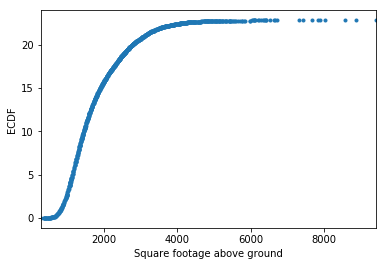

In [33]:
ecdf(df['sqft_above']).plot(marker='.', linestyle='none')
plt.xlabel('Square footage above ground')
plt.ylabel('ECDF')
plt.show()